In [28]:
from carbon.sdk import CarbonSDK, Tokens as T
#from carbon import CarbonOrderUI, CarbonSimulatorUI
from carbon.helpers.widgets import CheckboxManager, DropdownManager, PcSliderManager
from matplotlib import pyplot as plt
import numpy as np
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CarbonSDK))
!node --version

CarbonSDK v0.9 (11/Mar/2023)
v18.14.2


# Order Book [NB11]

_this notebook allows to select a pair and a quote direction via the dropdown / checkbox, and then displays the order book_

In order to start the server, please run

    source /Volumes/Private/bin/sdkserver
    node server/sdkserver.mjs

In [29]:
SDK = CarbonSDK(disclaimer=False, verbose=False, Tokens=T)
pairs, pairs_s = SDK.pairs(inclstr=True)
SDK.version().get("msg")

'Carbon SDK v0.9 (7/Mar/2022)'

In [30]:
try:
    pairs_sel = [s.strip() for s in pairs_s.split(",")]
    pairs_w()
except:
    pairs_w = DropdownManager(pairs_sel, defaultval="USDC/ETH")
    pairs_w()

Dropdown(options=(('USDC/ETH', 'USDC/ETH'), ('DAI/USDC', 'DAI/USDC')), value='USDC/ETH')

In [31]:
try:
    inverse_w()
except:
    inverse_w = CheckboxManager(["inverse"], values=[1])
    inverse_w()

In [32]:
tknb,tknq = pairs_w.value.split("/")
if inverse_w.values[0]:
    tknb,tknq = tknq, tknb
pair = f"{tknb}/{tknq}"
pair

'ETH/USDC'

In [33]:
liqa = SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknb)
liqb = SDK.mGetLiquidityByPair(pair=pair, AMMsells=tknq)
assert liqa.amount > 0 and liqb.amount > 0, f"no liquidity in pair {liqa} {liqb}"

In [34]:
range_bid = SDK.mGetRangeByPair(pair=pair, AMMsells=tknq)
range_ask = SDK.mGetRangeByPair(pair=pair, AMMsells=tknb)
mid = 0.5*(range_bid.startRate+range_ask.startRate)
p_bid = np.linspace(mid, range_bid.endRate)
p_ask = np.linspace(mid, range_ask.endRate)
range_bid, range_ask, mid

(RangeByPair(startRate=1989.9999997673926, endRate=899.9999999318561, AMMsells='USDC', AMMbuys='ETH', bidAsk='bid', pair=P('ETH/USDC'), inverted=True),
 RangeByPair(startRate=2005.0000000000175, endRate=3000.0000000000327, AMMsells='ETH', AMMbuys='USDC', bidAsk='ask', pair=P('ETH/USDC'), inverted=False),
 1997.4999998837052)

In [35]:
db = SDK.mGetRateLiquidityDepthByPair(rate=p_bid, pair=pair, AMMsells=tknq)
da = SDK.mGetRateLiquidityDepthByPair(rate=p_ask, pair=pair, AMMsells=tknb)

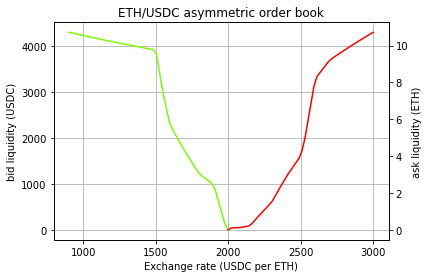

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel(f"Exchange rate ({db.pair.price_convention})")
ax1.plot(db.rate, db.amount, color="lawngreen", label="bid [LHS]")
ax1.set_ylabel(f"bid liquidity ({db.unit})")
ax2.plot(da.rate, da.amount, color="red", label="ask [RHS]")
ax2.set_ylabel(f"ask liquidity ({da.unit})")
plt.title(f"{db.pair.slashpair} asymmetric order book")
ax1.grid()

The chart above shows the order book. Note that bid and ask books are shown on different axis and therefore **bid and ask levels are not comparable**.